<a href="https://colab.research.google.com/github/glukonatic/III/blob/master/15_Light%2BPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию №15 "Введение в генетические алгоритмы"
## студента Университета искусственного интеллекта
## Наговицына Антона Михайловича
### Поток PRO НС - июль 2020 (основной тариф).

Части Лайт + Про

<img src="https://proza.ru/photos/glukonatic.jpg" alt="Фото Антон Наговицын" width="10%">

#Light

In [ ]:
#@title Доустановка библиотек

!pip install prettytable

In [ ]:
#@title Импорт библиотек

import random as random 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
from prettytable import PrettyTable

%matplotlib inline 

In [ ]:
#@title Функции для выполнения ДЗ

def getSurvPopul(popul,val,nsurv,reverse):
  '''
  Функция получения выжившей популяции
  Входные параметры:
    - popul - наша популяция
    - val - текущие значения
    - nsurv - количество выживших
    - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
  Выход функции:
    - newpopul - новая популяция из nsurv выживших
    - sval - сортированный список текущих значений val
  '''
  newpopul = []
  sval = sorted(val, reverse=reverse) 
  for i in range(nsurv): 
    index = val.index(sval[i]) 
    newpopul.append(popul[index]) 
  return newpopul, sval 

def getSurvPopul2(popul,val,nsurv,reverse):
  '''
  Функция получения выжившей популяции
  Входные параметры:
    - popul - наша популяция
    - val - текущие значения
    - nsurv - количество выживших
    - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
  Выход функции:
    - newpopul - новая популяция из nsurv выживших
    - sval - сортированный список текущих значений val
  '''
  newpopul = [] 
  sval = sorted(val, reverse=reverse) 
  for i in range(nsurv): 
    index = val.index(sval[i]) 
    newpopul.append(popul[index]) 
  return newpopul, sval 

def getParents(
        curr_popul,
        nsurv
        ):   
  '''
  Функция получения родителей
  Входные параметры:
    - curr_popul - текущая популяция
    - nsurv - количество выживших
  '''
  indexp1 = random.randint(0, nsurv - 1) 
  indexp2 = random.randint(0, nsurv - 1)
  botp1 = curr_popul[indexp1] 
  botp2 = curr_popul[indexp2]
  return botp1, botp2 

def crossPointFrom2Parents(botp1,botp2,j):
  '''
  Функция смешивания (кроссинговера) двух родителей
  Входные параметры:
   - botp1 - первый бот-родитель
   - botp2 - второй бот-родитель
   - j - номер компонента бота
  '''
  pindex = random.random() 
  
  if pindex < 0.5:
    x = botp1[j]
  else:
    x = botp2[j]
  return x 

def ga1_bot(bot):
  """
  Функция для вычисления значения функции в первом задании
  Возвращает полученные значения переменных и значение функции в точке
  """
  x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] 
  y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 
  z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11] 

  f = x**2/y + z*(12-z) + 5*y/x 

  return x, y, z, f

def ga1(n=100,nsurv=20,l=12,epohs=500,mut=0.15,acc = 0.001):
  '''
  Функция для ДЗ части Light-1,2
  Входные параметры:
    - n - Размер популяции
    - nsurv - Количество выживших (столько лучших переходит в новую популяцию)
    - l - Длина бота
    - epohs - Количество эпох
    - mut - Коэфициент мутаций
    - acc - точность результирущей "модели" из ботов популяции
  Выходные значения:
    - popul - результирующая популяция ботов
    - results - список значений функции
  '''
  
  nnew = n - nsurv 
  popul = [] 
  val = [] 
  
  results = list()

  for i in range(n): 
    popul.append([]) 
    for j in range(l): 
      popul[i].append(random.random()) 

  for it in range(epohs): 
    val = [] 

    for i in range(n): 
      bot = popul[i] 
    
      _, _, _, f = ga1_bot(bot)

      val.append(abs(f)) 
                         
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
 
    _, _, _, best_f = ga1_bot(newpopul[0])
    results.append(best_f)

    if abs(best_f) < acc:
      return popul, results

    for i in range(nnew): 
      botp1, botp2 = getParents(newpopul, nsurv)
      newbot = []
      for j in range(l): 
        x = crossPointFrom2Parents(botp1, botp2, j) 
        x += mut*(2*random.random() - 1.0)
        newbot.append(x) 
      newpopul.append(newbot)
    
    popul = newpopul 

  return popul, results

def ga2(train, size, popul_size=100,nsurv=20,epohs=2500,mut=[0.4,0.1,0.05],mut_ep_ch=[500,1000],acc=2):
  '''
  Функция для ДЗ части Light-3
  Входные параметры:
    - train - массив вместимостей поездов 
    - size - массив грузов
    - popul_size - Размер популяции
    - nsurv - Количество выживших (столько лучших переходит в новую популяцию)
    - epohs - Количество эпох
    - mut - Массив коэфициентов мутаций (три значения)
    - mut_ep_ch - Массив номеров эпох, когда коэффициент мутации меняется (два значения)
    - acc - точность результирущей "модели" из ботов популяции
  Выходные значения:
    - popul - результирующая популяция ботов
  '''

  mutation = mut[0]
  nnew = popul_size-nsurv 

  bot_len = size.shape[0] 
  trains = train.shape[0]

  popul = [] 
  global_val = [] 

  text = """
  Что означает "полное распределение грузов по поездам"?
  Вероятно, понимать надо как "не осталось ни одного нераспределенного груза".
  Следовательно, нам нужно поставить условие, что все грузы распределены, 
  с соблюдением условия достижения заданной точности,
  и это будет считаться необходимым и достаточным условием выполнения задания.
  """
  print(text)

  for i in range(popul_size): 
      popul.append([]) 
      for j in range(bot_len): 
          popul[i].append(random.randint(0, trains - 1)) 

  for epoch in range(epohs): 

      if (epoch == mut_ep_ch[0]): 
          mutation = mut[1]   
      if (epoch == mut_ep_ch[1]): 
          mutation = mut[2]  

      val = [] 
      for i in range(popul_size): 
          bot = popul[i] 
          trainfill = np.array([0 for _ in range(len(train))]) 
          for j in range(bot_len): 
              trainfill[bot[j]] += size[j] 
          
          f = 0 
          for t in range(trains): 
              f += abs(train[t] - trainfill[t]) 
          val.append(f) 

      newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    
      best_bot = newpopul[0]
      best_bot_trainfill = np.zeros(trains, dtype = 'int32') 
      
      for i in range(bot_len): 
          best_bot_trainfill[best_bot[i]] += size[i] 

      best_bot_acc = sum([abs(size1 - size2) for size1, size2 in zip(best_bot_trainfill, train)])
      global_val.append(best_bot_acc)

      if best_bot_acc <= acc and set(best_bot) == set(range(len(train))):
        return newpopul, global_val
      
      for i in range(nnew): 
          botp1, botp2 = getParents(newpopul, nsurv) 
          newbot = [] 
      
          for j in range(bot_len): 
              x = crossPointFrom2Parents(botp1, botp2, j)
              if (random.random() < mutation):
                  x = random.randint(0, trains - 1)        
              newbot.append(x) 
          newpopul.append(newbot) 
      popul = newpopul 

  return popul, global_val


def ga3(train, size, popul_size=100,nsurv=20,epohs=2500,mut=[0.4,0.1,0.05],mut_ep_ch=[500,1000],acc=2):
  '''
  Функция для ДЗ части Light-4
  Входные параметры:
    - train - массив вместимостей поездов 
    - size - массив грузов
    - popul_size - Размер популяции
    - nsurv - Количество выживших (столько лучших переходит в новую популяцию)
    - epohs - Количество эпох
    - mut - Массив коэфициентов мутаций (три значения)
    - mut_ep_ch - Массив номеров эпох, когда коэффициент мутации меняется (два значения)
    - acc - точность результирущей "модели" из ботов популяции
  Выходные значения:
    - popul - результирующая популяция ботов
  '''

  mutation = mut[0]
  nnew = popul_size-nsurv 

  bot_len = size.shape[0] 
  trains = train.shape[0] 

  popul = [] 
  global_val = [] 

  text = """
  Что означает "заполнить поезда максимально равномерно"?
  Можно понимать двояко:
  1. "максимально одинаковый процент загрузки поездов грузами"
  2. "количество грузов каждому поезду должно стремиться к одному значению"
  Выбираю выполнение 1 условия. 
  """
  print(text)

  for i in range(popul_size): 
      popul.append([]) 
      for j in range(bot_len): 
          popul[i].append(random.randint(0, trains - 1)) 

  for epoch in range(epohs): 

      if (epoch == mut_ep_ch[0]): 
          mutation = mut[1]   
          print('Мутация изменена на {}'.format(mutation))
      if (epoch == mut_ep_ch[1]): 
          mutation = mut[2]  
          print('Мутация изменена на {}'.format(mutation))

      val = [] 
      for i in range(popul_size): 
          bot = popul[i] 
          trainfill = np.array([0 for _ in range(len(train))]) 
          for j in range(bot_len): 
              trainfill[bot[j]] += size[j] 
          
          f = [] 
          for t in range(trains): 
              tmp = trainfill[t]/train[t]
              f.append(abs(trainfill[t]/train[t] - sum(size)/sum(train)))

          val.append(np.mean(f)) 
          
      newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 

      best_bot = newpopul[0] 
      best_bot_trainfill = np.zeros(trains, dtype = 'int32') 
      
      for i in range(bot_len): 
          best_bot_trainfill[best_bot[i]] += size[i] 

      best_bot_acc = abs([size1/size2 for size1, size2 in zip(best_bot_trainfill, train)] - sum(size)/sum(train))
      global_val.append(best_bot_acc)

      if np.mean(best_bot_acc) <= acc and set(best_bot) == set(range(len(train))):
        return newpopul, global_val

      for i in range(nnew): 
          botp1, botp2 = getParents(newpopul, nsurv) 
          newbot = [] 
      
          for j in range(bot_len): 
              x = crossPointFrom2Parents(botp1, botp2, j) 
              if (random.random() < mutation):
                  x = random.randint(0, trains - 1)        
              newbot.append(x) 
          newpopul.append(newbot) 
      popul = newpopul 

  return popul, global_val


## Выполнение заданий

In [ ]:
#@title 1.

#@markdown **ЗАДАНИЕ:** С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z * (12-z) + 5 * y/x равна 0 (символ ^2 -возведение в квадрат).

#@markdown Интервал изменения каждой переменной x, y, z и вывести на экран значение этой точки и значение функции в ней

#@markdown ---

p,r = ga1(100,20,12,5000,0.2)

x,y,z,f = ga1_bot(p[0])

table = PrettyTable(["x", "y", "z", "f"])
table.add_row([x, y, z, f])
print(table)

+--------------------+-------------------+--------------------+-----------------------+
|         x          |         y         |         z          |           f           |
+--------------------+-------------------+--------------------+-----------------------+
| 10.472506532881841 | 5.070672285166263 | 13.749590396846012 | -0.006241464434367572 |
+--------------------+-------------------+--------------------+-----------------------+


In [ ]:
#@title 2.

#@markdown **ЗАДАНИЕ:** Проведите анализ скорости сходимости до заданной вами точности (выберите точность, близкую к минимуму в прошлом примере) и заполните таблицу - какими были параметры и за сколько эпох алгоритм дошёл до нужной точности

#@markdown a. Выберите три разные размера популяции

#@markdown b. Выберите три разные коэффициента мутации

#@markdown c. Выберите три разных количества выживших

#@markdown ---

print("a. Выберите три разные размера популяции. Были выбраны 6")

n = [50,100,500,1000,5000,10000]
l = []

for i in n:
  p, r = ga1(i,20,12,5000,0.20)
  l.append(len(r))

table = PrettyTable(n)
table.add_row(l)
print(table)

print()

print("b. Выберите три разные коэффициента мутации. Были выбраны 9")

mut = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
l = []

for i in mut:
  p, r = ga1(100,20,12,5000,i)
  l.append(len(r))

table = PrettyTable(mut)
table.add_row(l)
print(table)

print()

print("c. Выберите три разных количества выживших. Были выбраны 10")

nsurv = [5,10,20,30,40,50,60,70,80,90]
l = []

for i in nsurv:
  p, r = ga1(100,i,12,10000,0.20)
  l.append(len(r))

table = PrettyTable(nsurv)
table.add_row(l)
print(table)

a. Выберите три разные размера популяции. Были выбраны 6
+------+------+-----+------+------+-------+
|  50  | 100  | 500 | 1000 | 5000 | 10000 |
+------+------+-----+------+------+-------+
| 5000 | 1718 |  9  |  29  |  36  |   2   |
+------+------+-----+------+------+-------+

b. Выберите три разные коэффициента мутации. Были выбраны 9
+-----+-----+-----+-----+------+------+------+------+-----+
| 0.1 | 0.2 | 0.3 | 0.4 | 0.5  | 0.6  | 0.7  | 0.8  | 0.9 |
+-----+-----+-----+-----+------+------+------+------+-----+
| 627 | 434 | 570 | 308 | 1446 | 2484 | 2349 | 2792 | 272 |
+-----+-----+-----+-----+------+------+------+------+-----+

c. Выберите три разных количества выживших. Были выбраны 10
+-----+-----+-----+----+-----+-----+------+------+------+-------+
|  5  |  10 |  20 | 30 |  40 |  50 |  60  |  70  |  80  |   90  |
+-----+-----+-----+----+-----+-----+------+------+------+-------+
| 866 | 479 | 814 | 5  | 103 | 672 | 3057 | 5375 | 6863 | 10000 |
+-----+-----+-----+----+-----+-----+-

In [ ]:
#@title 3.

#@markdown **ЗАДАНИЕ:** Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:

#@markdown Поезда - 1, 12, 72, 4, 55, 1

#@markdown Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

#@markdown ---

train = np.array([1, 12, 72, 4, 55, 1]) 
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) 

p,v = ga2(train, size, mut=[0.3,0.2,0.1], mut_ep_ch=[10000,50000], epohs=100000, acc=0)
print("На эпохе {} достигнута расстановка грузов по поездам с полным распределением грузов с точностью {}, не превышающей заданную.".format(len(v),v[-1]))
print("Значения лучшего бота: {}".format(p[0]))

trainfill = np.zeros(train.shape[0], dtype = 'int32') 
for i in range(len(p[0])): 
  trainfill[p[0][i]] += size[i] 

print ('Вместимость поездов по боту:', trainfill) 
print ('Реальная вместимость поездов:', train) 


  Что означает "полное распределение грузов по поездам"?
  Вероятно, понимать надо как "не осталось ни одного нераспределенного груза".
  Следовательно, нам нужно поставить условие, что все грузы распределены, 
  с соблюдением условия достижения заданной точности,
  и это будет считаться необходимым и достаточным условием выполнения задания.
  
На эпохе 2366 достигнута расстановка грузов по поездам с полным распределением грузов с точностью 0, не превышающей заданную.
Значения лучшего бота: [5, 0, 3, 2, 1, 4, 2, 3, 1, 4, 2, 2, 4, 4, 2, 4, 1, 2]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


In [ ]:
#@title 4.

#@markdown **ЗАДАНИЕ:** Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):

#@markdown Поезда - 10, 10, 10, 12, 12, 12

#@markdown Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

#@markdown ---

train = np.array([10, 10, 10, 12, 12, 12]) 

size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 

p,v = ga3(train, size, popul_size=1000, nsurv=200, mut=[0.7,0.5,0.1], mut_ep_ch=[10,50], epohs=100, acc=0.03)
print("На эпохе {} достигнута расстановка грузов по поездам с полным и наиболее равномерным распределением грузов.".format(len(v)))
print("Значения лучшего бота: {}".format(p[0]))

trainfill = np.zeros(train.shape[0], dtype = 'int32') 
for i in range(len(p[0])): 
  trainfill[p[0][i]] += size[i] 

print ('Вместимость поездов по боту:', trainfill) 
print ('Реальная вместимость поездов:', train) 


  Что означает "заполнить поезда максимально равномерно"?
  Можно понимать двояко:
  1. "максимально одинаковый процент загрузки поездов грузами"
  2. "количество грузов каждому поезду должно стремиться к одному значению"
  Выбираю выполнение 1 условия. 
  
Мутация изменена на 0.5
Мутация изменена на 0.1
На эпохе 77 достигнута расстановка грузов по поездам с полным и наиболее равномерным распределением грузов.
Значения лучшего бота: [5, 3, 2, 1, 5, 0, 1, 5, 4, 3, 4, 2, 4, 2, 1, 5, 0, 3]
Вместимость поездов по боту: [ 8  8  8 10 10 10]
Реальная вместимость поездов: [10 10 10 12 12 12]


#Pro

**ЗАДАНИЕ:** Выберите другую симуляцию из окружений openAI (можно из той же серии для движка box2d https://gym.openai.com/envs/#box2d) 

С помощью генетического алгоритма обучите объект выбранной симуляции выполнять поставленную задачу


## Доустановка библиотек, импорт библиотек, объявление функций для выполнения ДЗ

In [ ]:
#@title Предварительная подготовка

# Будем обращаться к линукс-ядру напрямую с помощью команд на "!"
# Будем устанавливать окружение из пакета Stable Baseline для OpenAI (для того,  чтобы можно было использовать движок в колабе)
# Код,  представленный в документации разработчика
!apt install swig cmake libopenmpi-dev zlib1g-dev # cmake - сборка - аналог GNU Make,  но с другим синтаксисом,  libopenmpi-dev распределённые вычисления в кластере для дебиан,  zlib1g-dev - сжатие траффика
!pip install stable-baselines==2.5.1 box2d box2d-kengz # устанавливаем непосредственно сам stable baseline и движок box2d

# если убрать " > /dev/null 2>&1" то работа сервера будет выведена на экран, а этой командой перемещаем все в фоновый режим
!pip install gym pyvirtualdisplay > /dev/null 2>&1 # установка пакета для рендера видео
!pip install xvfbwrapper # установка обертки для пакета, который позволит воспроизводить видео в ячейке колаба 
!apt-get update # обновляем все пакеты до новейшей версии, чтобы все пакеты "подружились"
!sudo apt-get install xvfb # установка удаленного сервера, благодаря которому видео будет воспроизводиться в ячейке колаба
!apt-get install xdpyinfo # пакет для вывода процессов, происходящих на сервере
!pip install prettytable

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 64 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http:

In [ ]:
#@title Импорт библиотек

import gym # здесь лежат все модели для 
from gym import logger as gymlogger # загрузим библиотеку для изменения параметра вывода ошибок
from gym.wrappers import Monitor # библиотека для обертки видео из хранилища в ячейку
gymlogger.set_level(40) # для правильного отображения ошибок
import numpy as np # библиотека массивов numpy
import random # библиотека для генерации случайных значений
import matplotlib # библиотека для визуализации процессов
import matplotlib.pyplot as plt # библиотека для построения графика
import glob # расширение для использования Unix обозначений при задании пути к файлу
import io # библиотека для работы с потоковыми данными
import base64 # расширение для преобразования в формат base64 (универсальный формат хранения сырых изображений в виде набора электрических сигналов)
from IPython.display import HTML # библиотека для кодирования в код HTML
import time # библиотека для расчета времени обучения

from IPython import display as ipythondisplay # для работы с "сырым" форматом (набор сигналов, а не пиксели)
from pyvirtualdisplay import Display # для создания окна дисплея

from prettytable import PrettyTable
from IPython.display import clear_output

%matplotlib inline

In [ ]:
#@title Функции для ДЗ

def show_video():
  '''
  Функция, позволяющая записывать видео того,
  что происходит в окружении и отображать это в колабе
  '''
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

def calculateStep(observation, bot):
  act = []

  for i in bot:
    res = np.dot(observation, i)
    res = min(1.0, res)
    res = max(-1.0, res)
    act.append(res)

  return act

def getSurvPopul(popul, val, nsurv, reverse): 
  '''
  Функция получения выжившей популяции
    Входные параметры:
    - popul - наша популяция
    - val - текущие значения
    - nsurv - количество выживших
    - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
  '''
  newpopul = [] 
  
  sval = sorted(val, reverse=reverse) 
  for i in range(nsurv): 
    index = val.index(sval[i]) 
    newpopul.append(popul[index]) 
  return newpopul, sval 

def getParents(curr_popul, nsurv):   
  '''
  Функция получения родителей
    Входные параметры:
    - curr_popul - текущая популяция
    - nsurv - количество выживших
  '''
  indexp1 = random.randint(0, nsurv - 1) 
  indexp2 = random.randint(0, nsurv - 1) 
  botp1 = curr_popul[indexp1] 
  botp2 = curr_popul[indexp2] 
  
  return botp1, botp2 


def crossPointFrom2Parents(botp1, botp2, j):
  '''
  Функция смешивания (кроссинговера) двух родителей
    Входные параметры:
    - botp1 - первый бот-родитель
    - botp2 - второй бот-родитель
    - j - номер компонента бота
  '''
  pindex = np.random.random() 
  if pindex < 0.5:
    x = botp1[j].copy()
  else:
    x = botp2[j].copy()
  return x 
    

def countValue(popul):
  '''
  Функция расчета вознаграждения за эпизод
    Входные параметры:
    - popul - популяция ботов
  '''
  action = np.zeros(shape=(4))

  reward_list = [] 

  for bot in popul: 
    env.seed(0)  
    env.reset() 
    i = 0 
    tmp = 0
    done = False

    while done != True:
      observation, reward, done, _ = env.step(action) 
      action = calculateStep(observation, bot)
      tmp += reward

    env.close()
    reward_list.append(tmp) 
    
  return reward_list  

## Инициализируем среду и запускаем генетический алгоритм

In [ ]:
#@title Готовим среду отображения в ноутбуке и создаем среду двуногого молотка

display = Display(visible=0, size=(1400, 900))
display.start()
env =  gym.make('BipedalWalker-v3')

+-------+----------------+------------------+--------------------+----------------------+--------------------+--------------------+
| Эпоха | Время эпохи, c | Всего времени, c |     Лучший бот     |      Второй бот      |     Третий бот     |   Четвертый бот    |
+-------+----------------+------------------+--------------------+----------------------+--------------------+--------------------+
|   0   |       70       |        70        | -67.87747503167884 |  -70.26807482147095  | -71.3064296343617  | -72.53753759841113 |
|   1   |       82       |       152        | -1.726131669655203 |  -59.19863226006193  | -60.48900345553374 | -65.77353851795708 |
|   2   |      104       |       256        | 2.5636464334840987 | -0.11410212851818566 | -6.119434443002463 | -56.01632977972923 |
|   3   |      130       |       385        | 59.38785061846748  |  49.69928446143753   | 2.908797514322124  | -4.480109066518538 |
|   4   |      142       |       528        | 60.790345531167084 |  53.38004

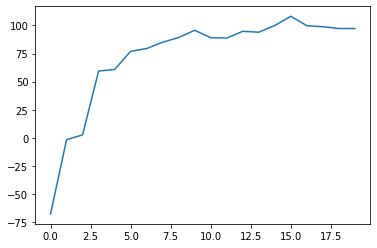

In [ ]:
#@title Запускаем генетический алгоритм для блуждающего молотка

#@markdown Число ботов в популяции
numBots =  300#@param {type: "number"}
#@markdown Количество выживших
nsurv = 30  #@param {type: "number"}
#@markdown Количество эпох
epohs = 20 #@param {type: "number"}
#@markdown Коэффициент мутации
mut = 0.1 #@param {type: "number"}
#@markdown Пограничное число очков, при достижении которых останавливаем алгоритм
rew_border = 300 #@param {type: "number"}

num_actions = 4
num_obs = 24
popul = [] 
total = []
nnew = numBots-nsurv 

curr_time_global = time.time()
curr_time = curr_time_global 

for i in range(numBots):
  bot = []
  for ii in range(num_actions):
    params = []
    for iii in range(num_obs):
      params.append(random.uniform(-1, 1))
    bot.append(params)
  popul.append(bot)

table = PrettyTable(["Эпоха","Время эпохи, c","Всего времени, c","Лучший бот","Второй бот","Третий бот","Четвертый бот"])

for epoch in range(epohs):
  val = countValue(popul)
  newpopul, sval = getSurvPopul(popul, val, nsurv, 1)

  if sval[0] > 300:
    break

  row = [epoch, round(time.time() - curr_time), round(time.time() - curr_time_global)]
  row.extend(sval[0:4])
  table.add_row(row)
  clear_output(wait=True)
  print(table)
  total.append(sval[0])
  curr_time = time.time() 

  for family in range(nnew):
    p1, p2 = getParents(newpopul, nsurv) 
    newbot = [] 

    for param in range(len(p1)): 
      x = crossPointFrom2Parents(p1, p2, param) 
      
      for t in range(14):
        if random.random() < mut:
          x[t] += random.random()*1e-1
      newbot.append(x)

    newpopul.append(newbot)

  popul = np.array(newpopul) 

plt.plot(total)
print(np.mean(total))
print(np.max(total))

In [ ]:
#@title Берем наиуспешнейшего бота и выводим результат

val = countValue(popul) 
newpopul, sval = getSurvPopul(popul, val, nsurv, 1) 
env = wrap_env(env) 
env.seed(0) 
observation = env.reset() 
i=0
action = np.zeros(shape=(4))

while True:
    env.render() 
    observation, reward, done, _ = env.step(action) 
    action = calculateStep(observation, newpopul[0])
    if done: 
      break;
            
env.close()
show_video()

Можно и лучшего результата достичь, и если это удастся сделать, обновлю ноутбук с ним.

# Конец